In [19]:
def process_record (record):
    #count=0
    new_record= {'Strain':[],'genotype':[],'subtype':[],'Version':[],'country':[],'governate':[],'gene':[]}
    gene_of_interest=['NS5B','NS5A protein ','NS5B protein ','nonstructural protein 5B F','NS5b','non-structural protein 5B','NS5B RNA dependent RNA polymerase','nonstructural protein 5b','NSB5 protein','nonstructural protein 5A','NS3 protein','NS5A','NS3 protease','RNA-dependent RNA polymerase','NS3','nonstructural protein 5','NS5','NS5a','NS3 protease/helicase','NS5B RNA-dependent RNA polymerase']
    temp=''
    gov=[]

    for i in record:
        i=i.lstrip()
        if i.startswith('VERSION'):
            new_record['Version'].append(i[12:])

        elif i.startswith('/country='):
            lin=i[10:-1]
            lin=lin.split(':')
            new_record['country'].append(lin[0])
            if len(lin)>1:
                temp=lin[-1].split()
                for t in temp:
                    if 'governorate' in temp:
                        temp.remove('governorate')
                        gov.append(temp)
                    elif 'Governorate'in temp:
                        temp.remove('Governorate')
                        gov.append(temp)
            for g in gov:
                if len(g)>1:
                    new_record['governate'].append(str(g[-1]))
                else:
                    new_record['governate'].append(str(g[0]))

        elif i.startswith('/strain='):
            new_record['Strain'].append(i[9:-1])
        
        elif i.startswith('/product='):
            temp=i[10:-1]
            if temp in gene_of_interest:
                new_record['gene'].append(temp)
        elif i.startswith('/gene='):
            temp=i[7:-1]
            if temp in gene_of_interest:
                new_record['gene'].append(temp)
        elif i.startswith('/note='):
            if 'subtype' in i:
                f=i.split()
                new_record['subtype'].append(f[1])
            else:
                x=i.find('gen')
                if x>0:
                    i=i[x:-1]
                    y=i.split(':')
                    new_record['genotype'].append(y[-1])
    return  new_record;

In [20]:
dataSource=['EgyptianNotEgypt.gb']
record = []
for x in dataSource:
    filh=open(x)
    for line in filh:
        line=line.lstrip()
        line=line.rstrip()
        if (not line.startswith('//')):
#             print(line)
            record.append(line)
        else:
            result=process_record(record)
            continue

In [21]:
print(result)

{'Strain': ['EUEG28', 'EUEG15'], 'genotype': [' 4', ' 4', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4o', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4n', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 4a', ' 1b', ' 1g', ' 4a', ' 4a', ' 4a'], 'subtype': [], 'Version': ['U31256.1', 'U31255.1', 'JN564688.1', 'JN564687.1', 'JN564686.1', 'JN564685.1', 'JN564684.1', 'JN564683.1', 'JN564682.1', 'JN564681.1', 'JN564680.1', 'JN564679.1', 'AB726066.1', 'AB726065.1', 'AB726064.1', 'AB726063.1', 'AB726062.1', 'AB726061.1', 'AB726060.1', 'AB726059.1', 'AB726058.1', 'AB726057.1', 'AB726056.1', 'AB726055.1', 'AB726054.1', 'AB726053.1', 'AB726052.1', 'AB726051.1', 'AB726050.1', 'AB726049.1', 'AB726048.1', 'AB726047.1', 'AB726046.1', 'AB726045.1', 'AB726044.1', 'AB726043.1', 'AB726042.1', 'AB726041.1', 'AB726040.1', 'AB726039.1', 'AB726038.1', 'AB726037

In [22]:
d = dict()
for c in result['gene']:
    if c not in d:
        d[c] = 1 
    else:
        d[c] = d[c] + 1
print(d)


{'NS5B': 38}


In [23]:
import pandas as pd

In [24]:
from matplotlib import pyplot as plt

In [25]:
plt.rcParams['figure.figsize']=[15,6]

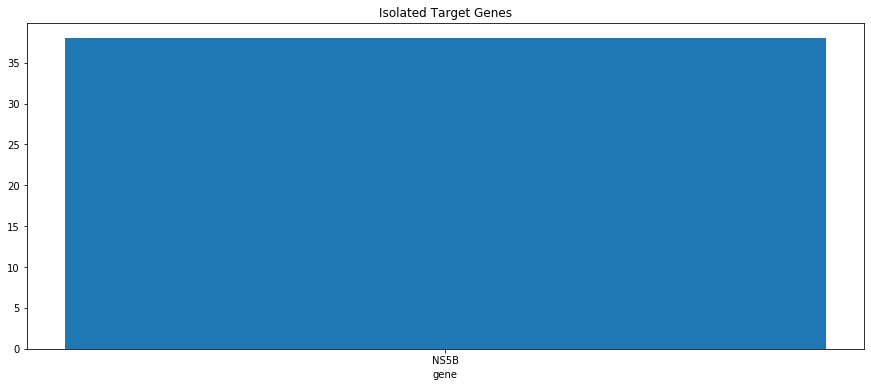

In [26]:
for key in d:
    x =key[0:6] 
    y =d[key]
    plt.bar(x, y)
    plt.title("Isolated Target Genes")
    plt.xlabel("gene")
plt.show()

In [27]:
con = dict()
for z in result['country']:
    if z not in con:
        con[z] = 1 
    else:
        con[z] = con[z] + 1
print(con)
#print(result['country'])

{'Netherlands': 48}


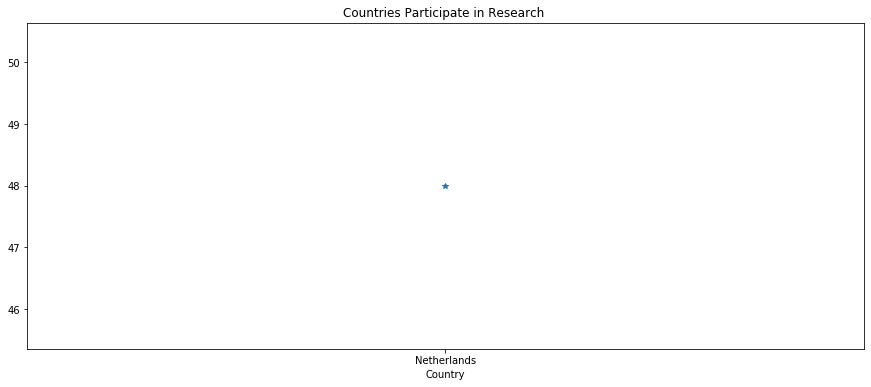

In [28]:
for key in con:
    x =key 
    y =con[key]
    plt.plot(x, y,'*')
    plt.title("Countries Participate in Research ")
    plt.xlabel("Country")
plt.show()

In [29]:
genotype = dict()
for z in result['genotype']:
    if z not in genotype:
        genotype[z] = 1 
    else:
        genotype[z] = genotype[z] + 1
print(genotype)

{' 4': 3, ' 4a': 43, ' 4o': 1, ' 4n': 1, ' 1b': 1, ' 1g': 1}


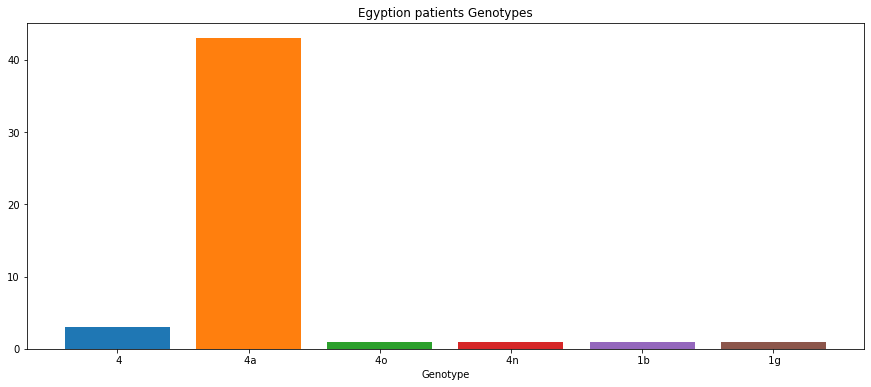

In [30]:
for key in genotype:
    x =key 
    y =genotype[key]
    plt.bar(x, y)
    plt.title("Egyption patients Genotypes")
    plt.xlabel("Genotype")
plt.show()

In [31]:
strain=dict()
for s in result['Strain']:
    if s not in  strain:
        strain[s] = 1 
    else:
        strain[s] = strain[s] + 1
print(strain)

{'EUEG28': 1, 'EUEG15': 1}


In [33]:
Gov=dict()
for s in result['governate']:
    if s not in  Gov:
        Gov[s] = 1 
    else:
        Gov[s] = Gov[s] + 1
print(Gov)

{}


In [34]:
for key in Gov:
    x =key[:-2] 
    y =Gov[key]
    plt.bar(x, y)
    plt.title("Egypt Geographical distripution of the conducted research")
    plt.xlabel("Government")
plt.show()

In [35]:
# Test for Any duplicated records
Version=dict()
for v in result['Version']:
    if v not in  Version:
        Version[v] = 1 
    else:
        Version[v] = Version[v] + 1
print(Version)

{'U31256.1': 1, 'U31255.1': 1, 'JN564688.1': 1, 'JN564687.1': 1, 'JN564686.1': 1, 'JN564685.1': 1, 'JN564684.1': 1, 'JN564683.1': 1, 'JN564682.1': 1, 'JN564681.1': 1, 'JN564680.1': 1, 'JN564679.1': 1, 'AB726066.1': 1, 'AB726065.1': 1, 'AB726064.1': 1, 'AB726063.1': 1, 'AB726062.1': 1, 'AB726061.1': 1, 'AB726060.1': 1, 'AB726059.1': 1, 'AB726058.1': 1, 'AB726057.1': 1, 'AB726056.1': 1, 'AB726055.1': 1, 'AB726054.1': 1, 'AB726053.1': 1, 'AB726052.1': 1, 'AB726051.1': 1, 'AB726050.1': 1, 'AB726049.1': 1, 'AB726048.1': 1, 'AB726047.1': 1, 'AB726046.1': 1, 'AB726045.1': 1, 'AB726044.1': 1, 'AB726043.1': 1, 'AB726042.1': 1, 'AB726041.1': 1, 'AB726040.1': 1, 'AB726039.1': 1, 'AB726038.1': 1, 'AB726037.1': 1, 'AB726036.1': 1, 'AB726035.1': 1, 'AB726034.1': 1, 'AB726033.1': 1, 'AB726032.1': 1, 'AB726031.1': 1, 'AB726030.1': 1, 'AB726029.1': 1, 'AB726028.1': 1, 'AB726027.1': 1, 'AB726026.1': 1, 'AB726025.1': 1, 'AB726024.1': 1, 'AB726023.1': 1, 'AB726022.1': 1, 'AB726021.1': 1, 'AB726020.1': 1, 

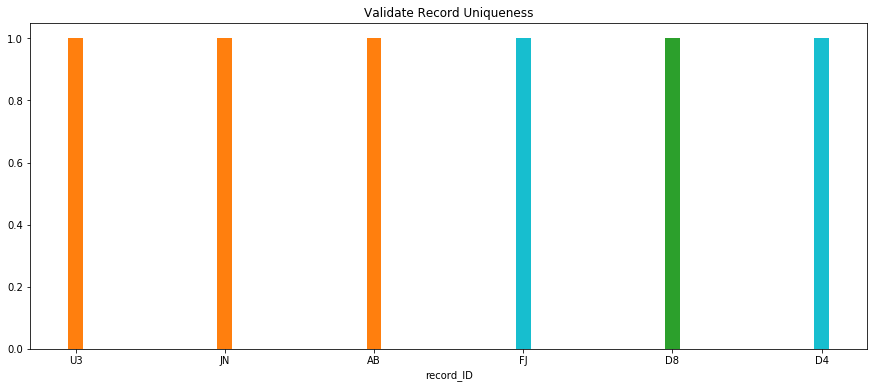

In [36]:
for key in Version:
    x =key[0:2] 
    y =Version[key]
    plt.bar(x, y,0.1)
    plt.title("Validate Record Uniqueness")
    plt.xlabel("record_ID")
plt.show()